In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import sys
sys.path.append('../uscode')

import matplotlib.pyplot as plt
import itertools
import random
import numpy as np

In [3]:
import util
from uscode import USCode
from citation_network import CitationNetwork
from cluster import *

In [4]:
usc = USCode.from_json('../data/usc20191009.json')
print(len(usc.titles))

53


In [5]:
cn = CitationNetwork(usc)
print(len(cn.nodes))

64165


In [6]:
def show_dendrogram(sections):
    vectorization_clustering = Clustering(sections, vectorization_distance)
    sinks_clustering = Clustering(sections, CitationSinks(sections, cn).distance)
    citation_clustering = Clustering(sections, citation_distance)
    
    clusterings = [vectorization_clustering, sinks_clustering, citation_clustering]
    for i, clustering in enumerate(clusterings):
        plt.figure(figsize=(40, 30))
        clustering.plot_dendrogram()
        plt.xticks(fontsize=14)
        plt.yticks(fontsize=14)
        if i == 0:
            plt.yscale('symlog')

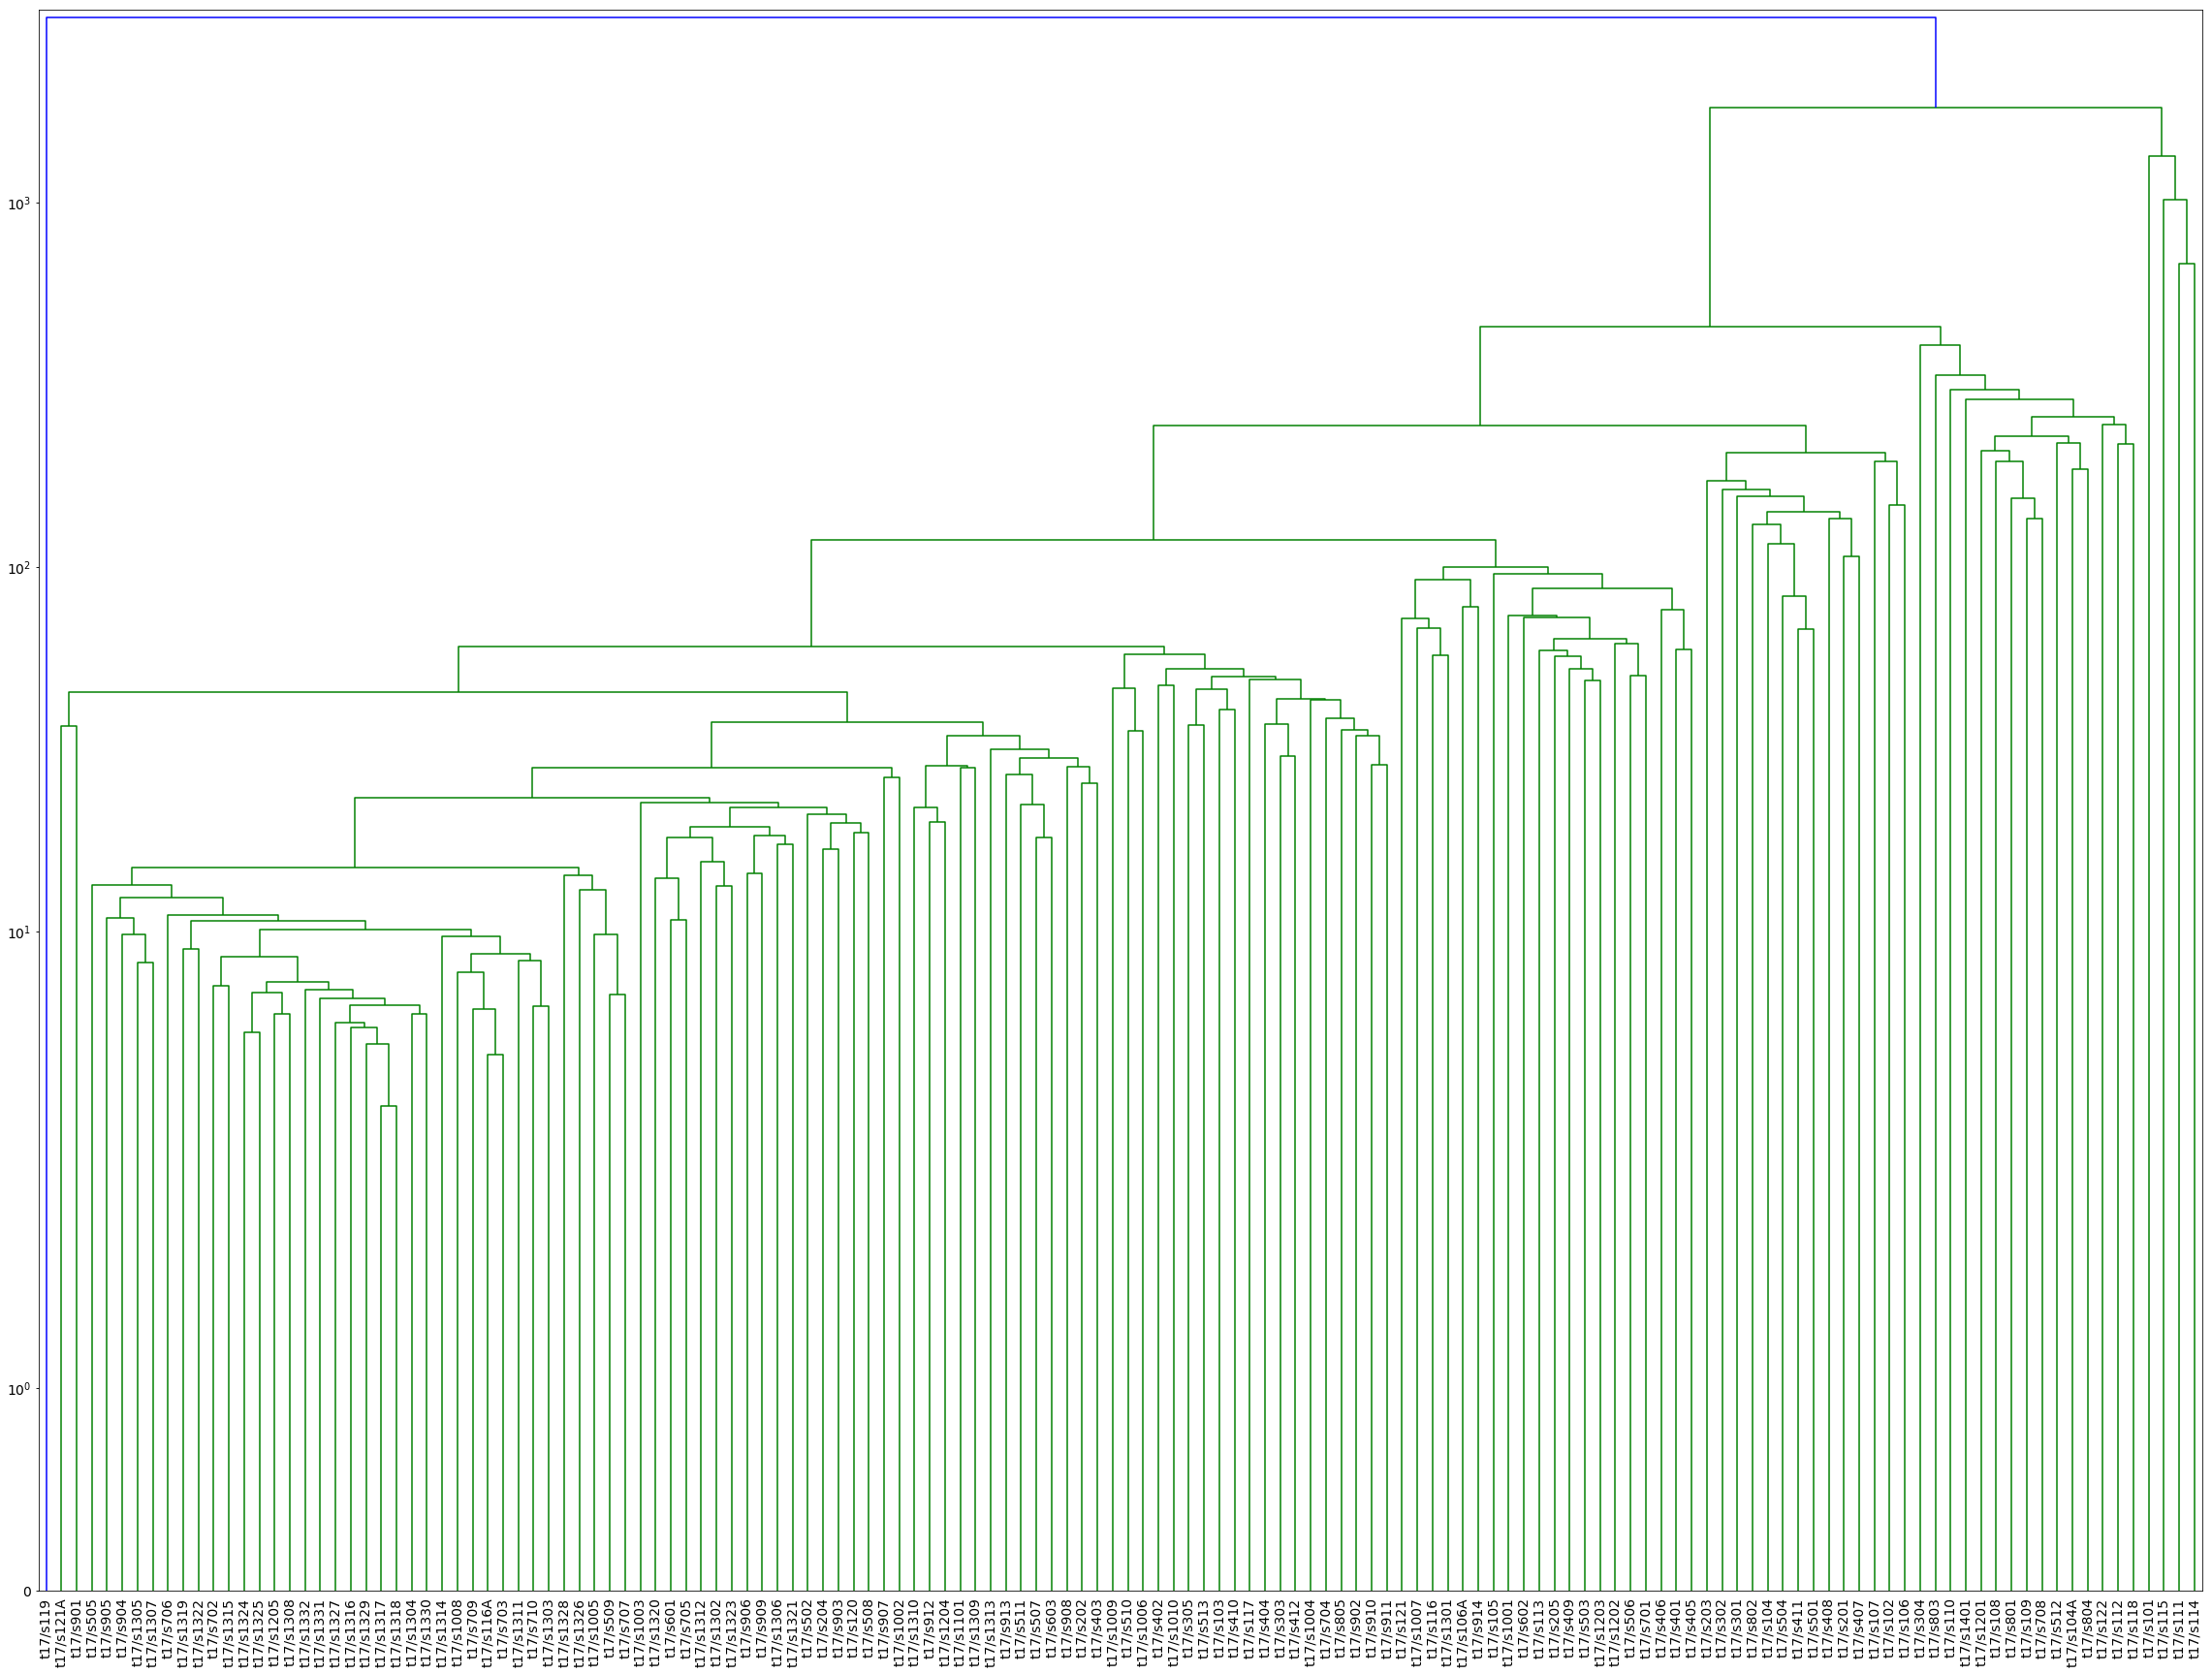

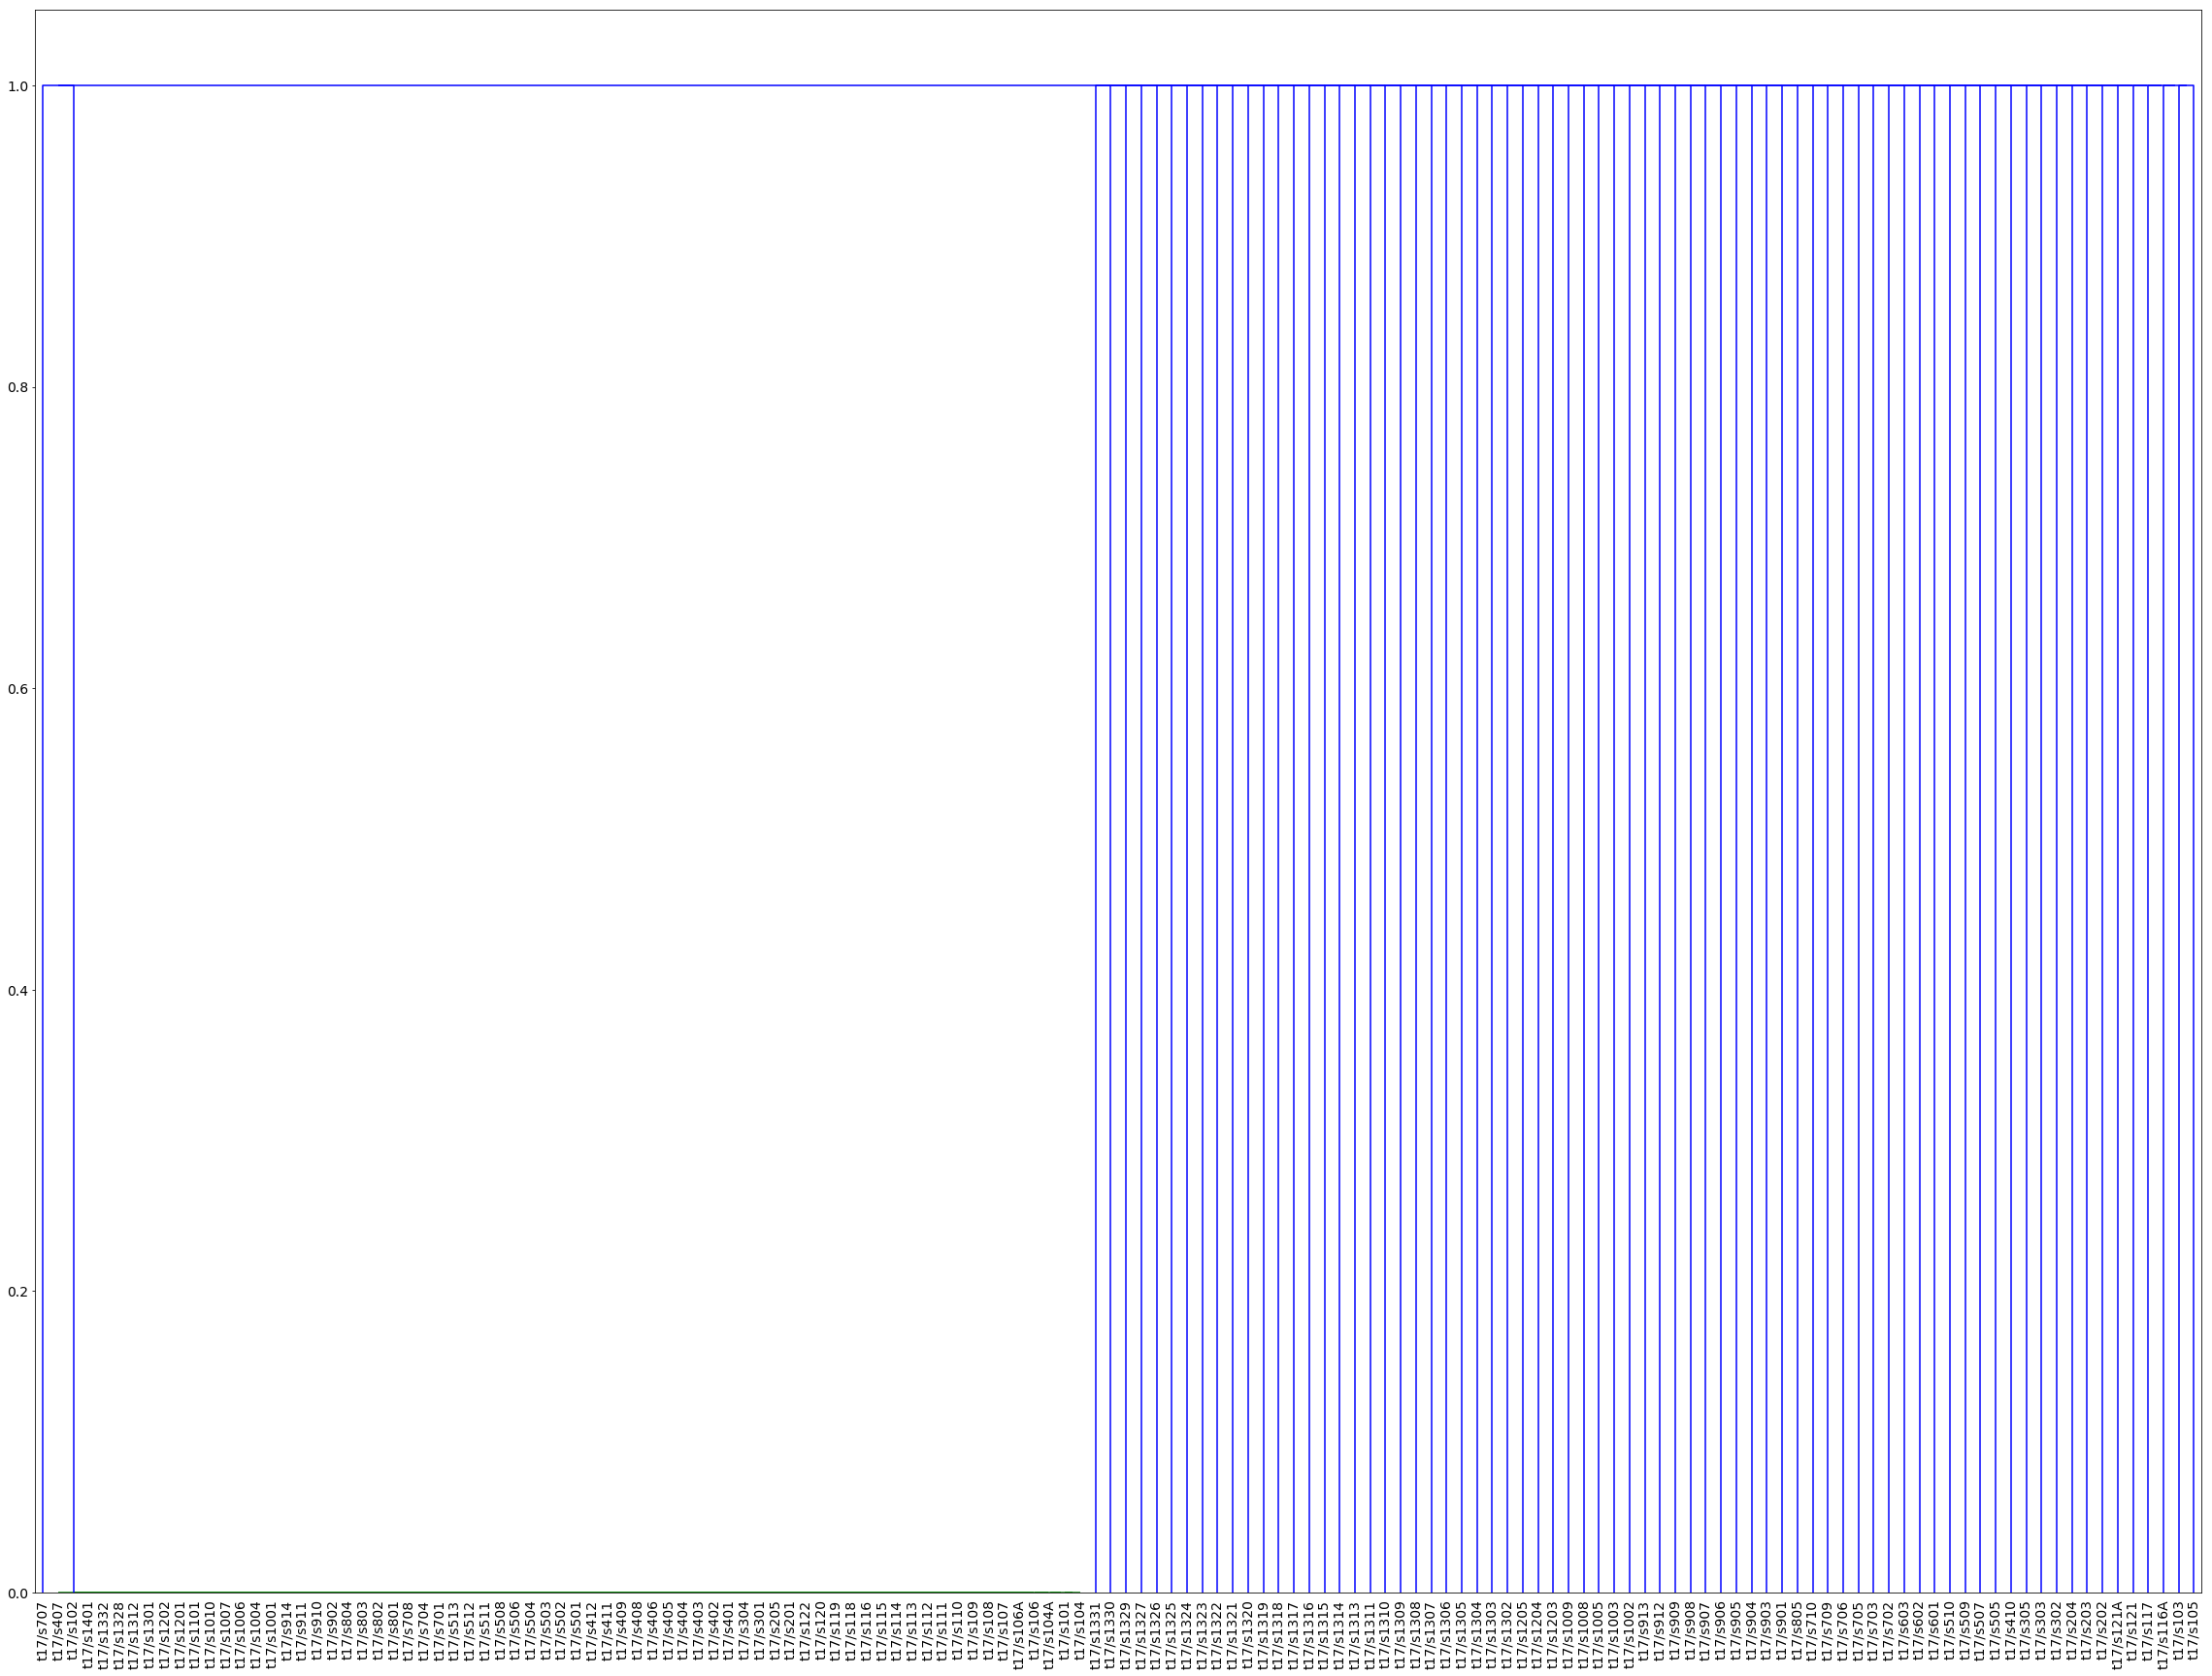

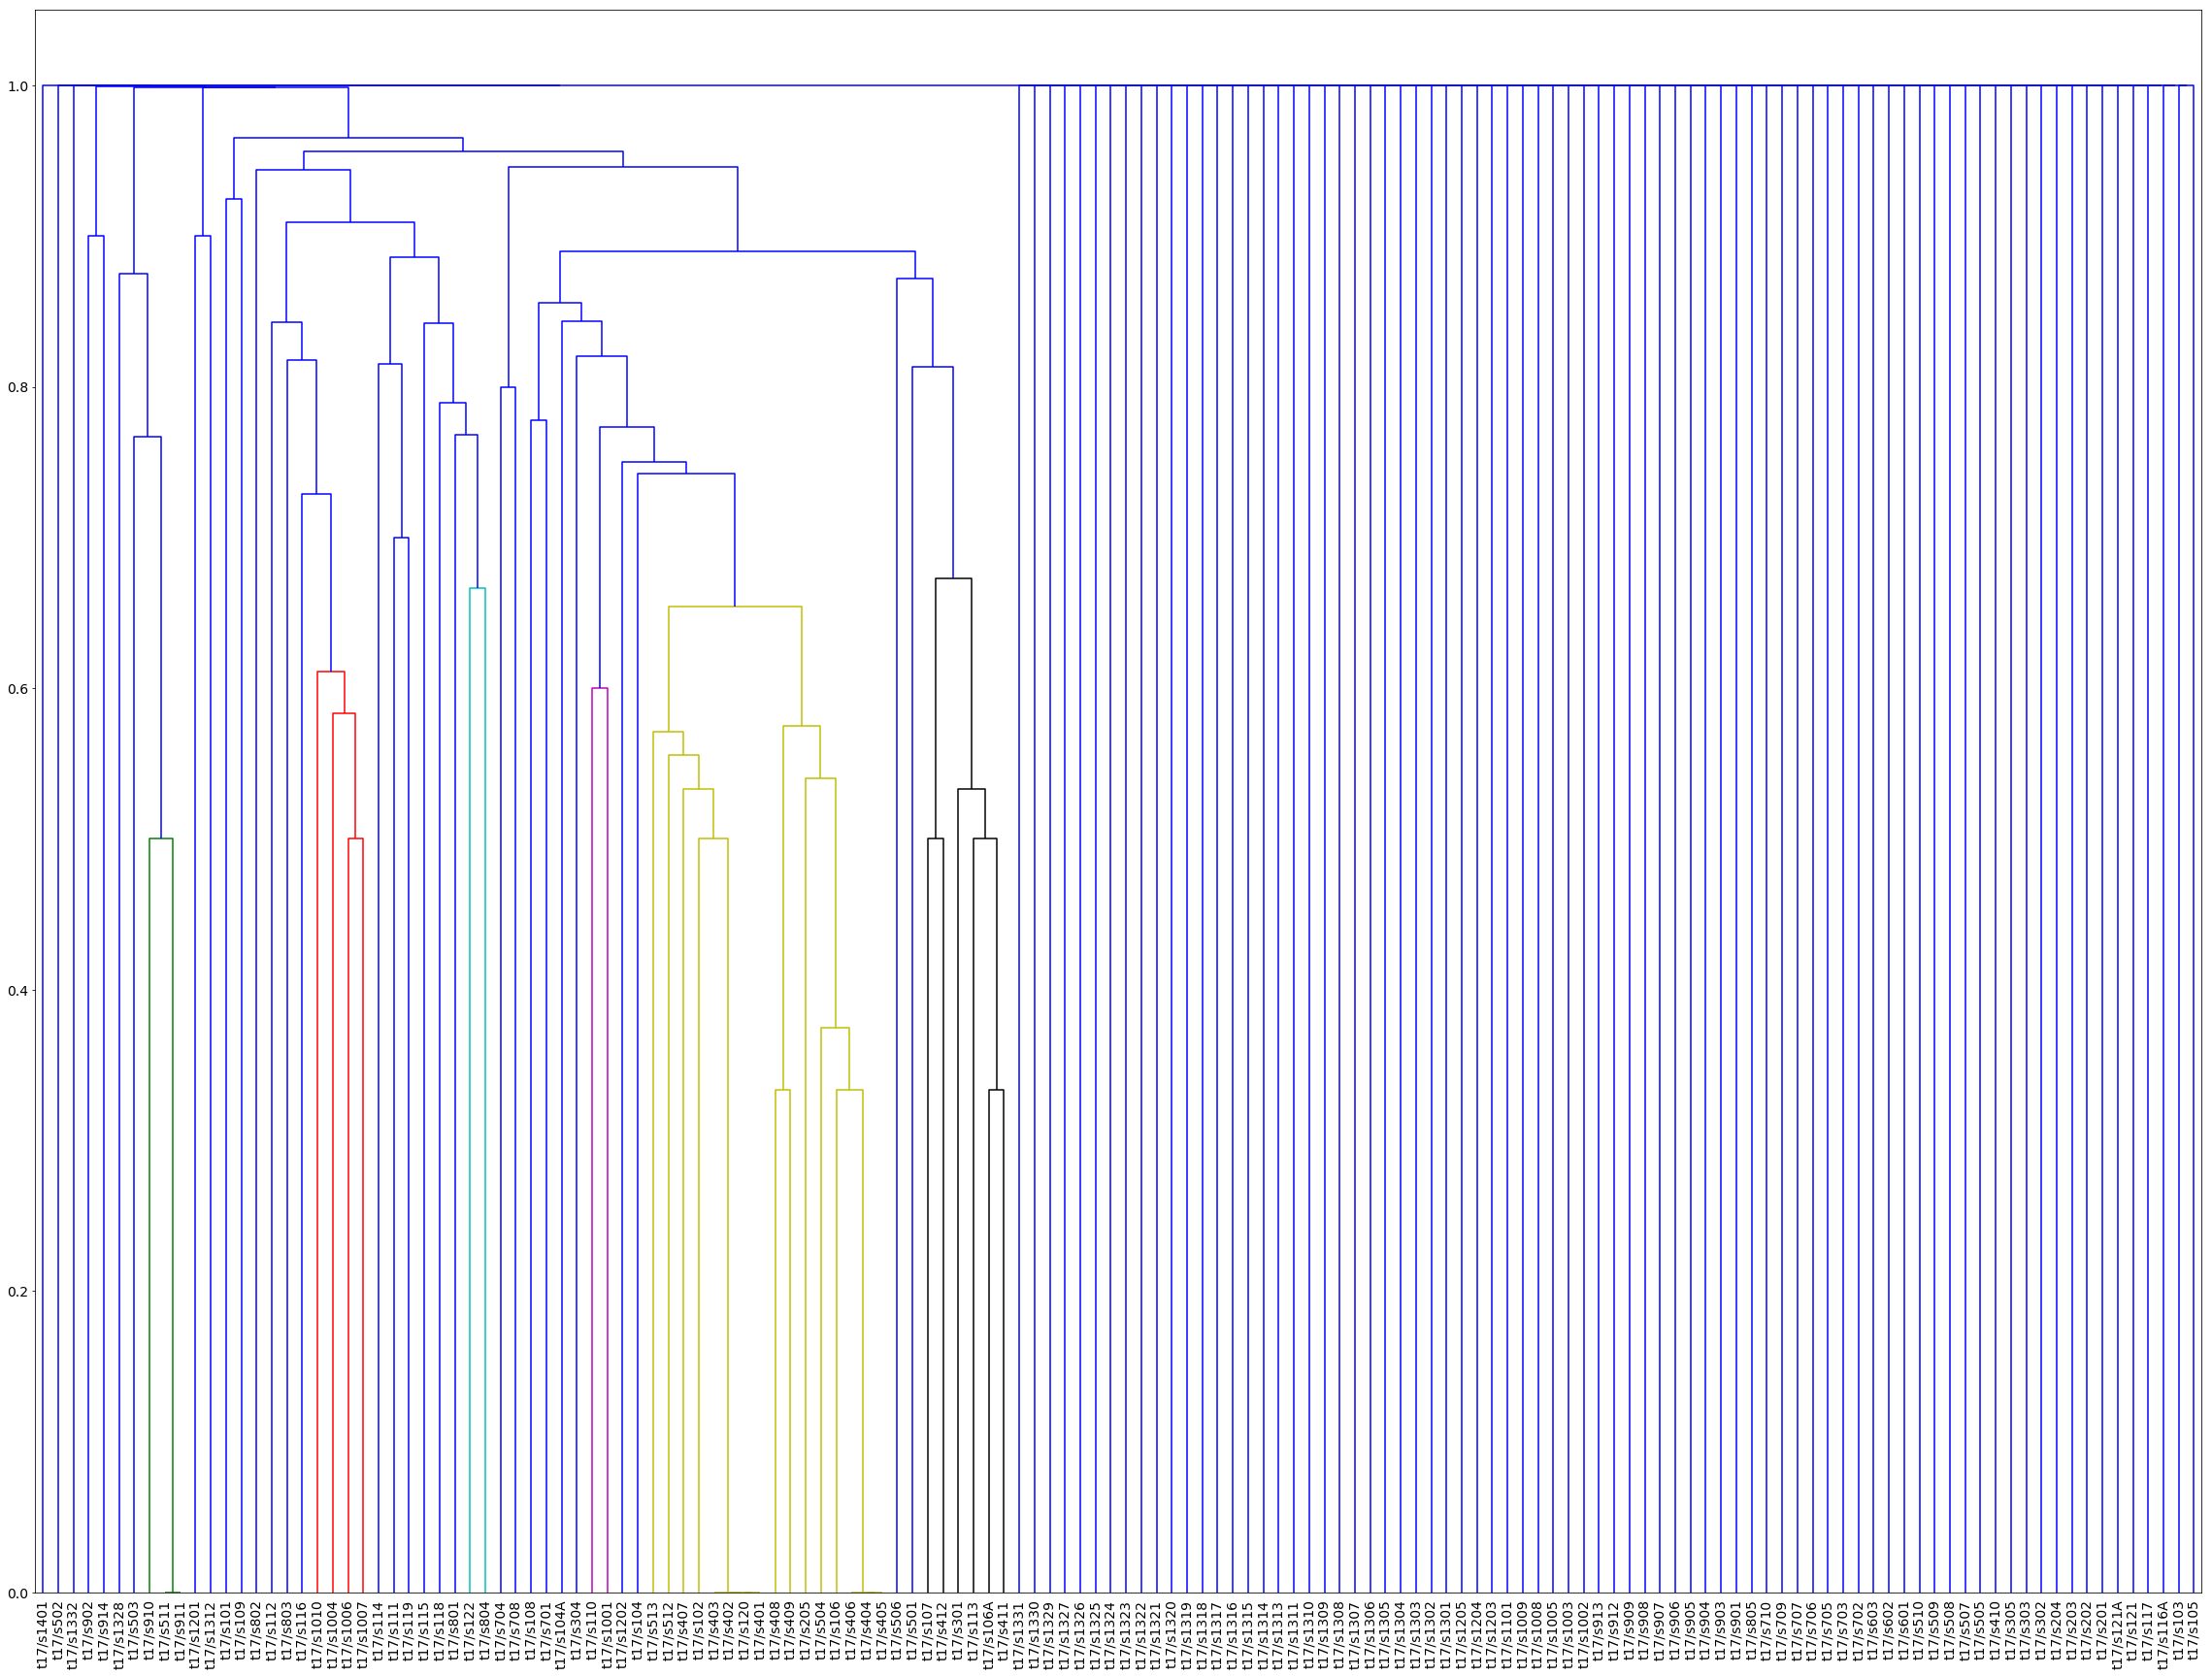

In [7]:
t = 't17'
show_dendrogram(list(usc.titles[t].iter_sections()))

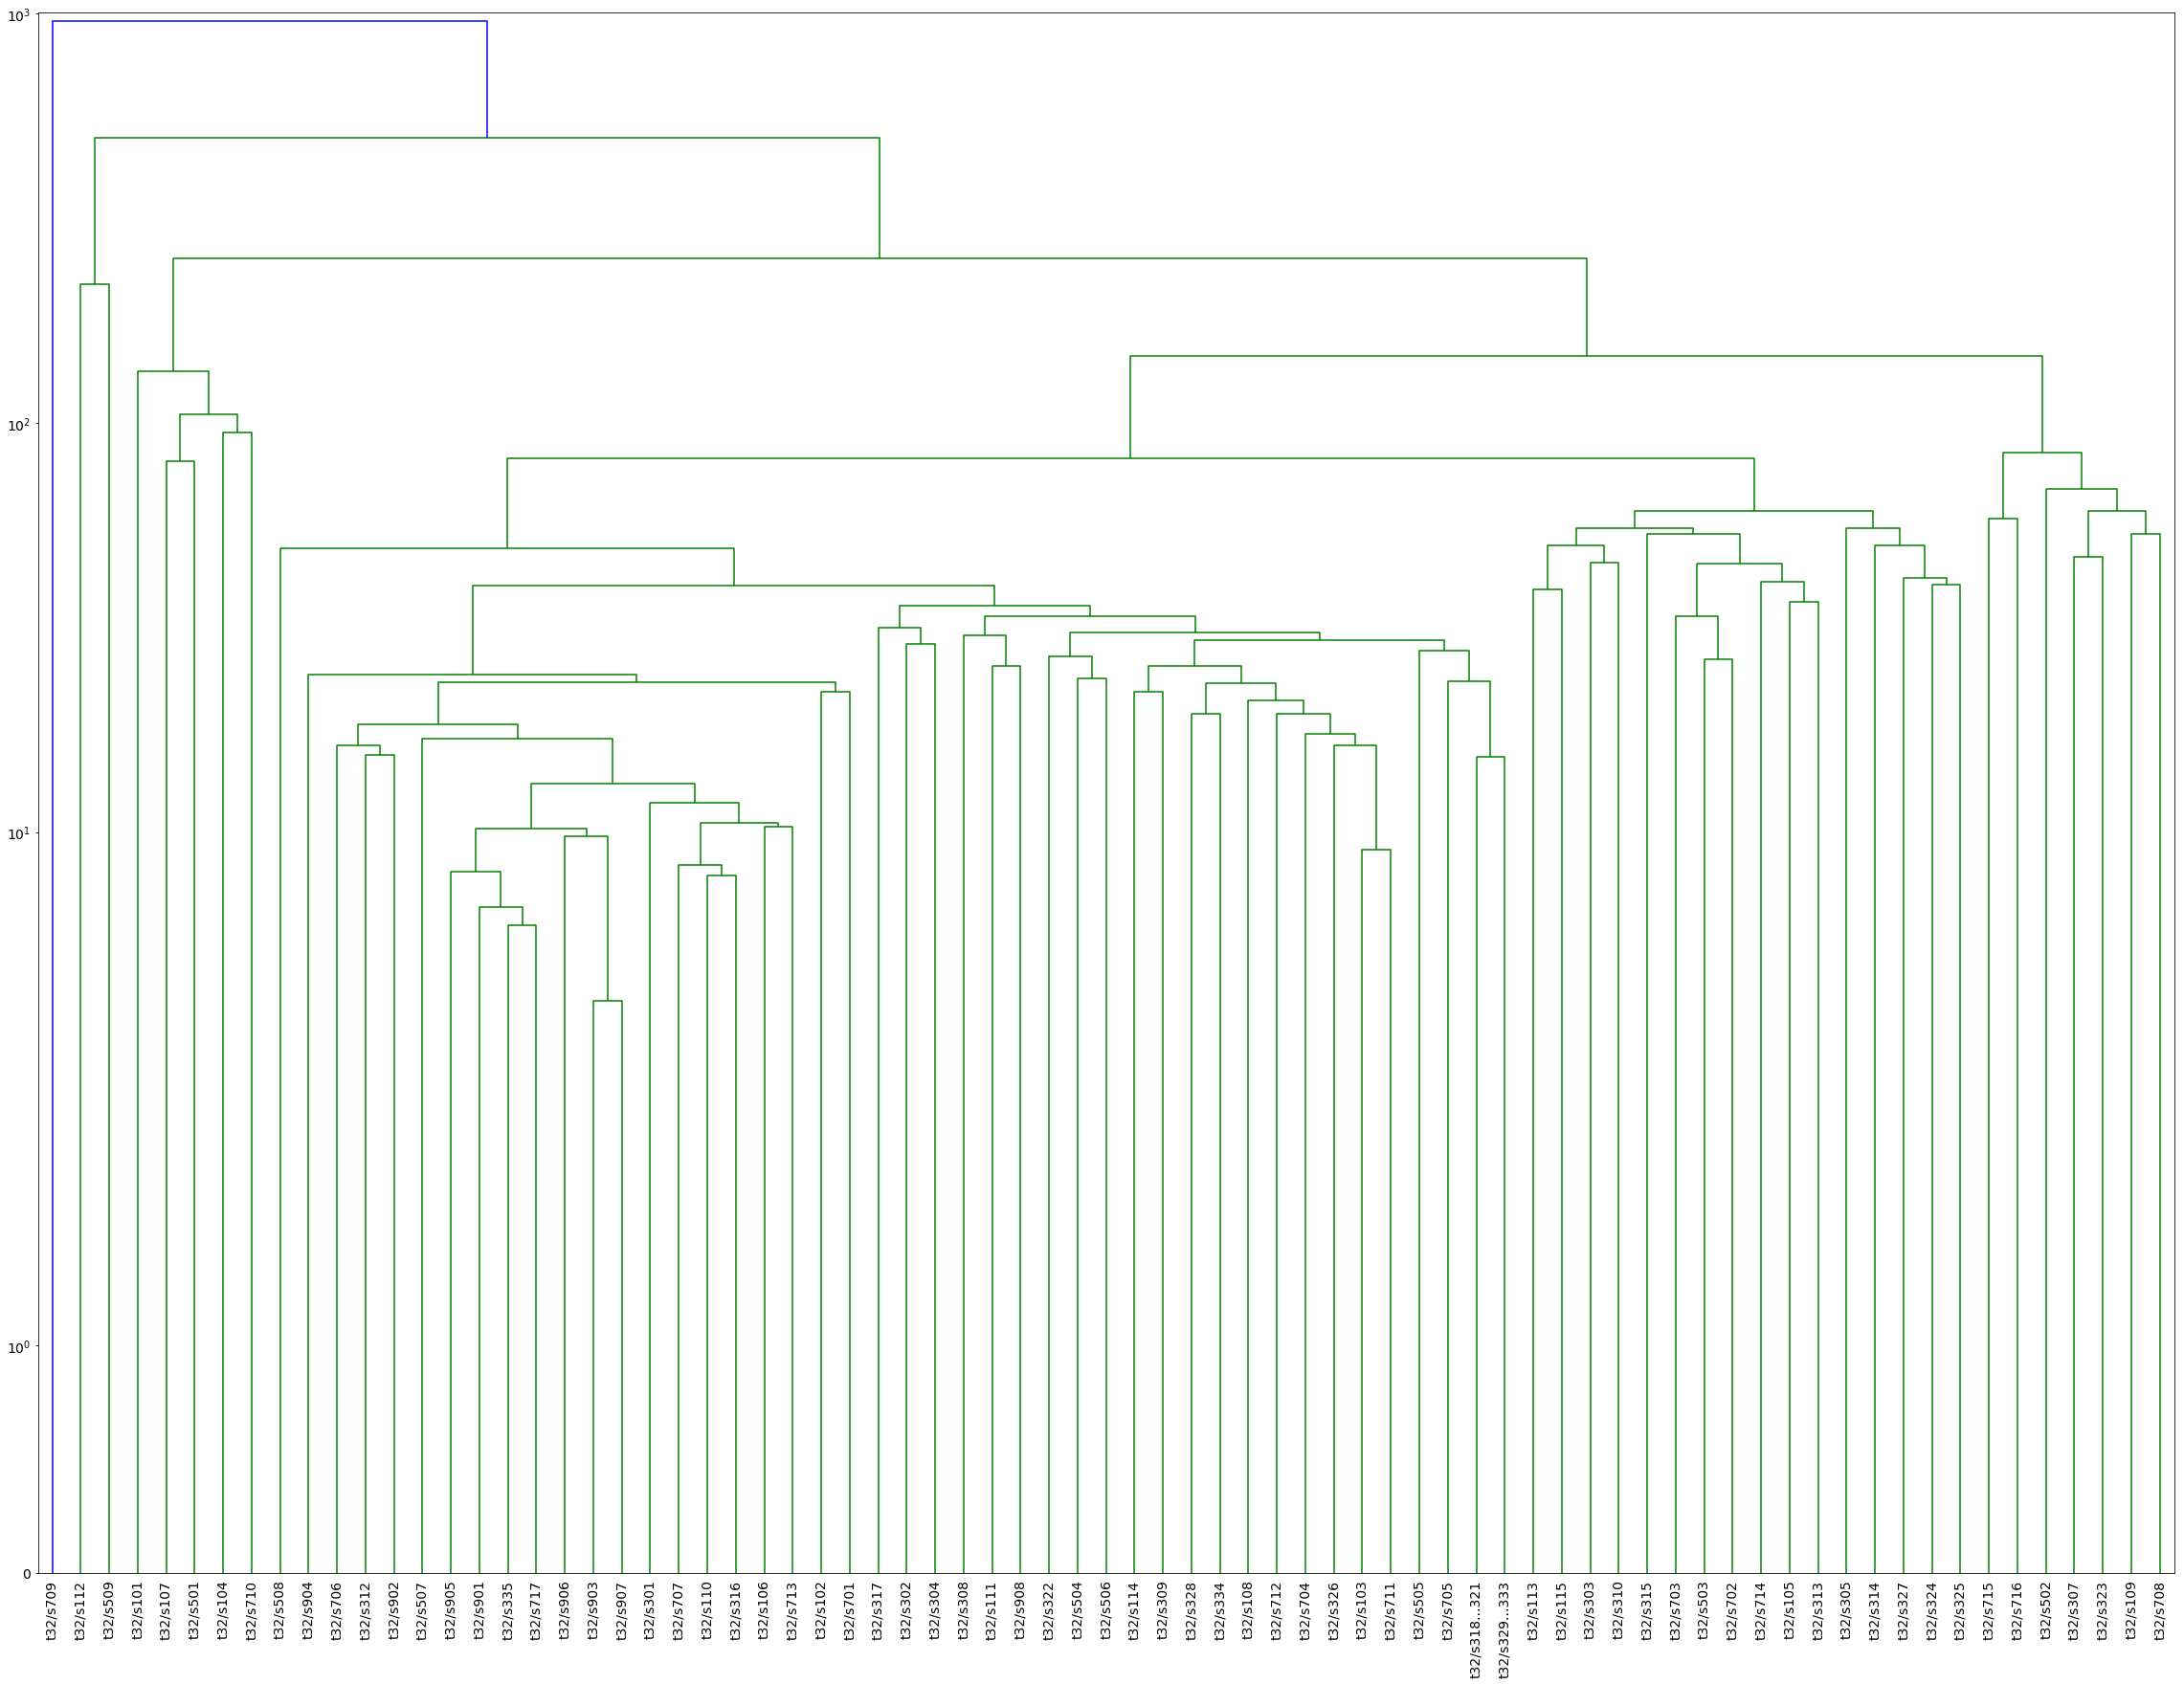

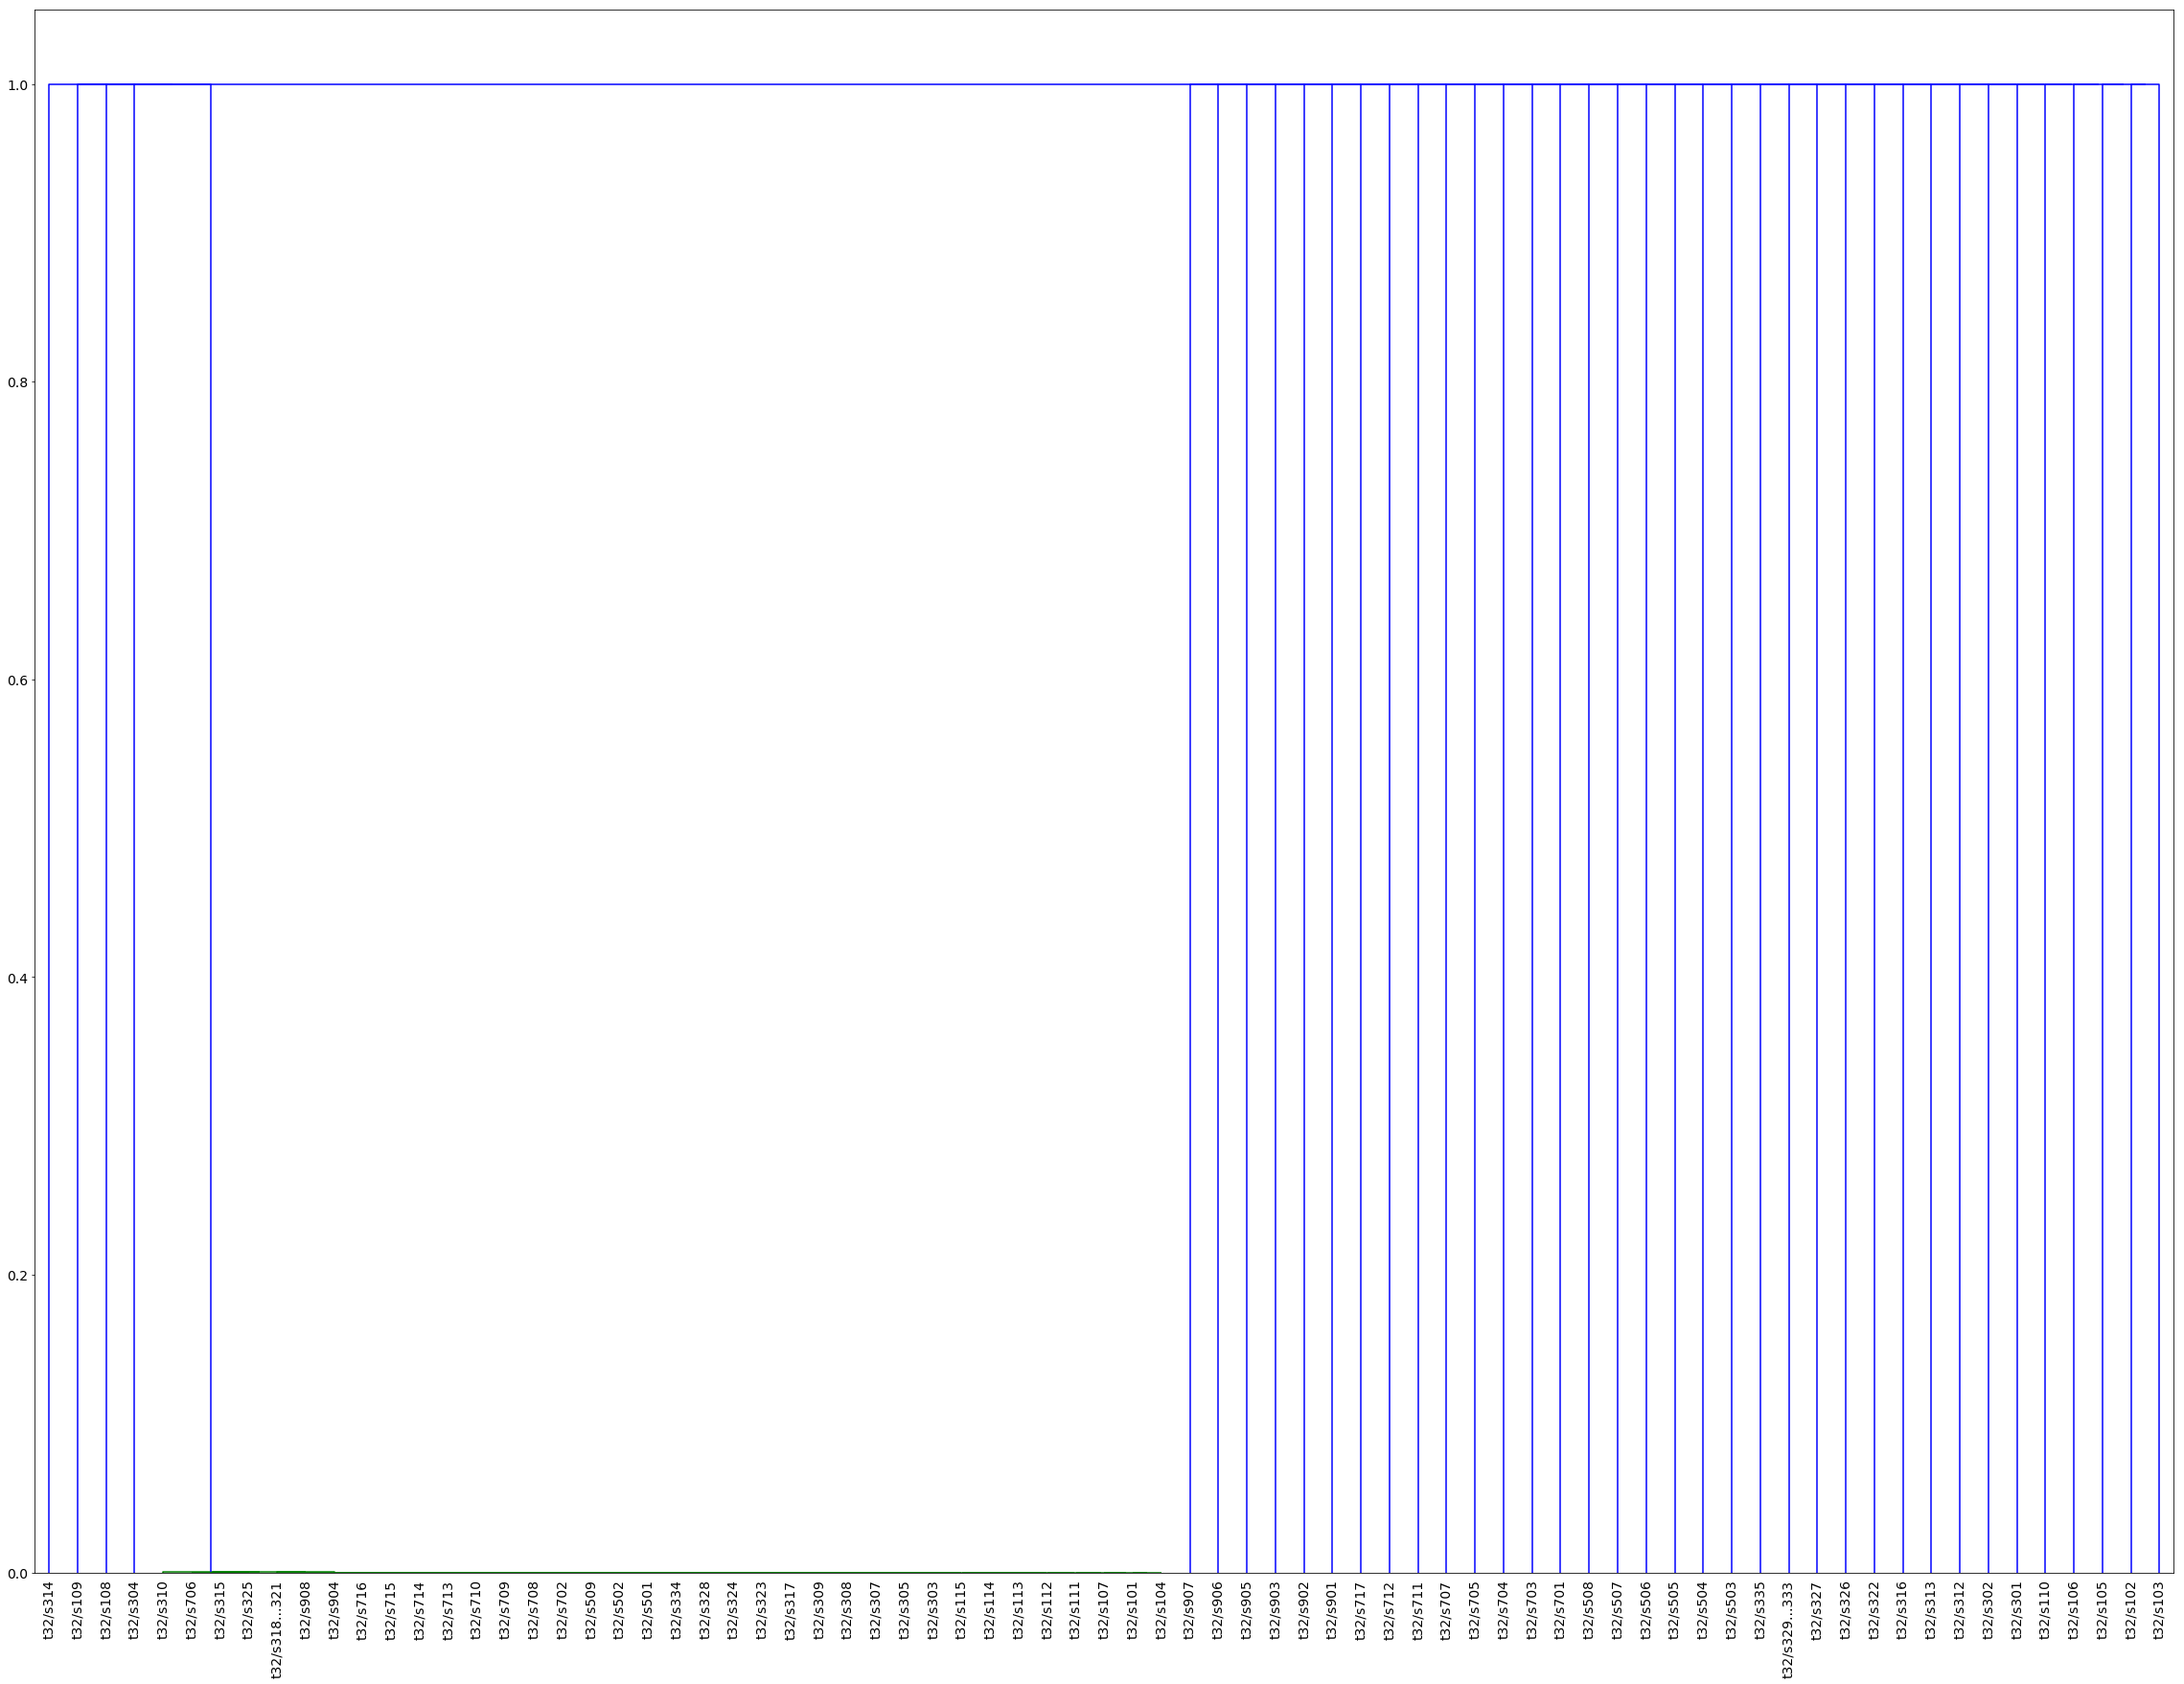

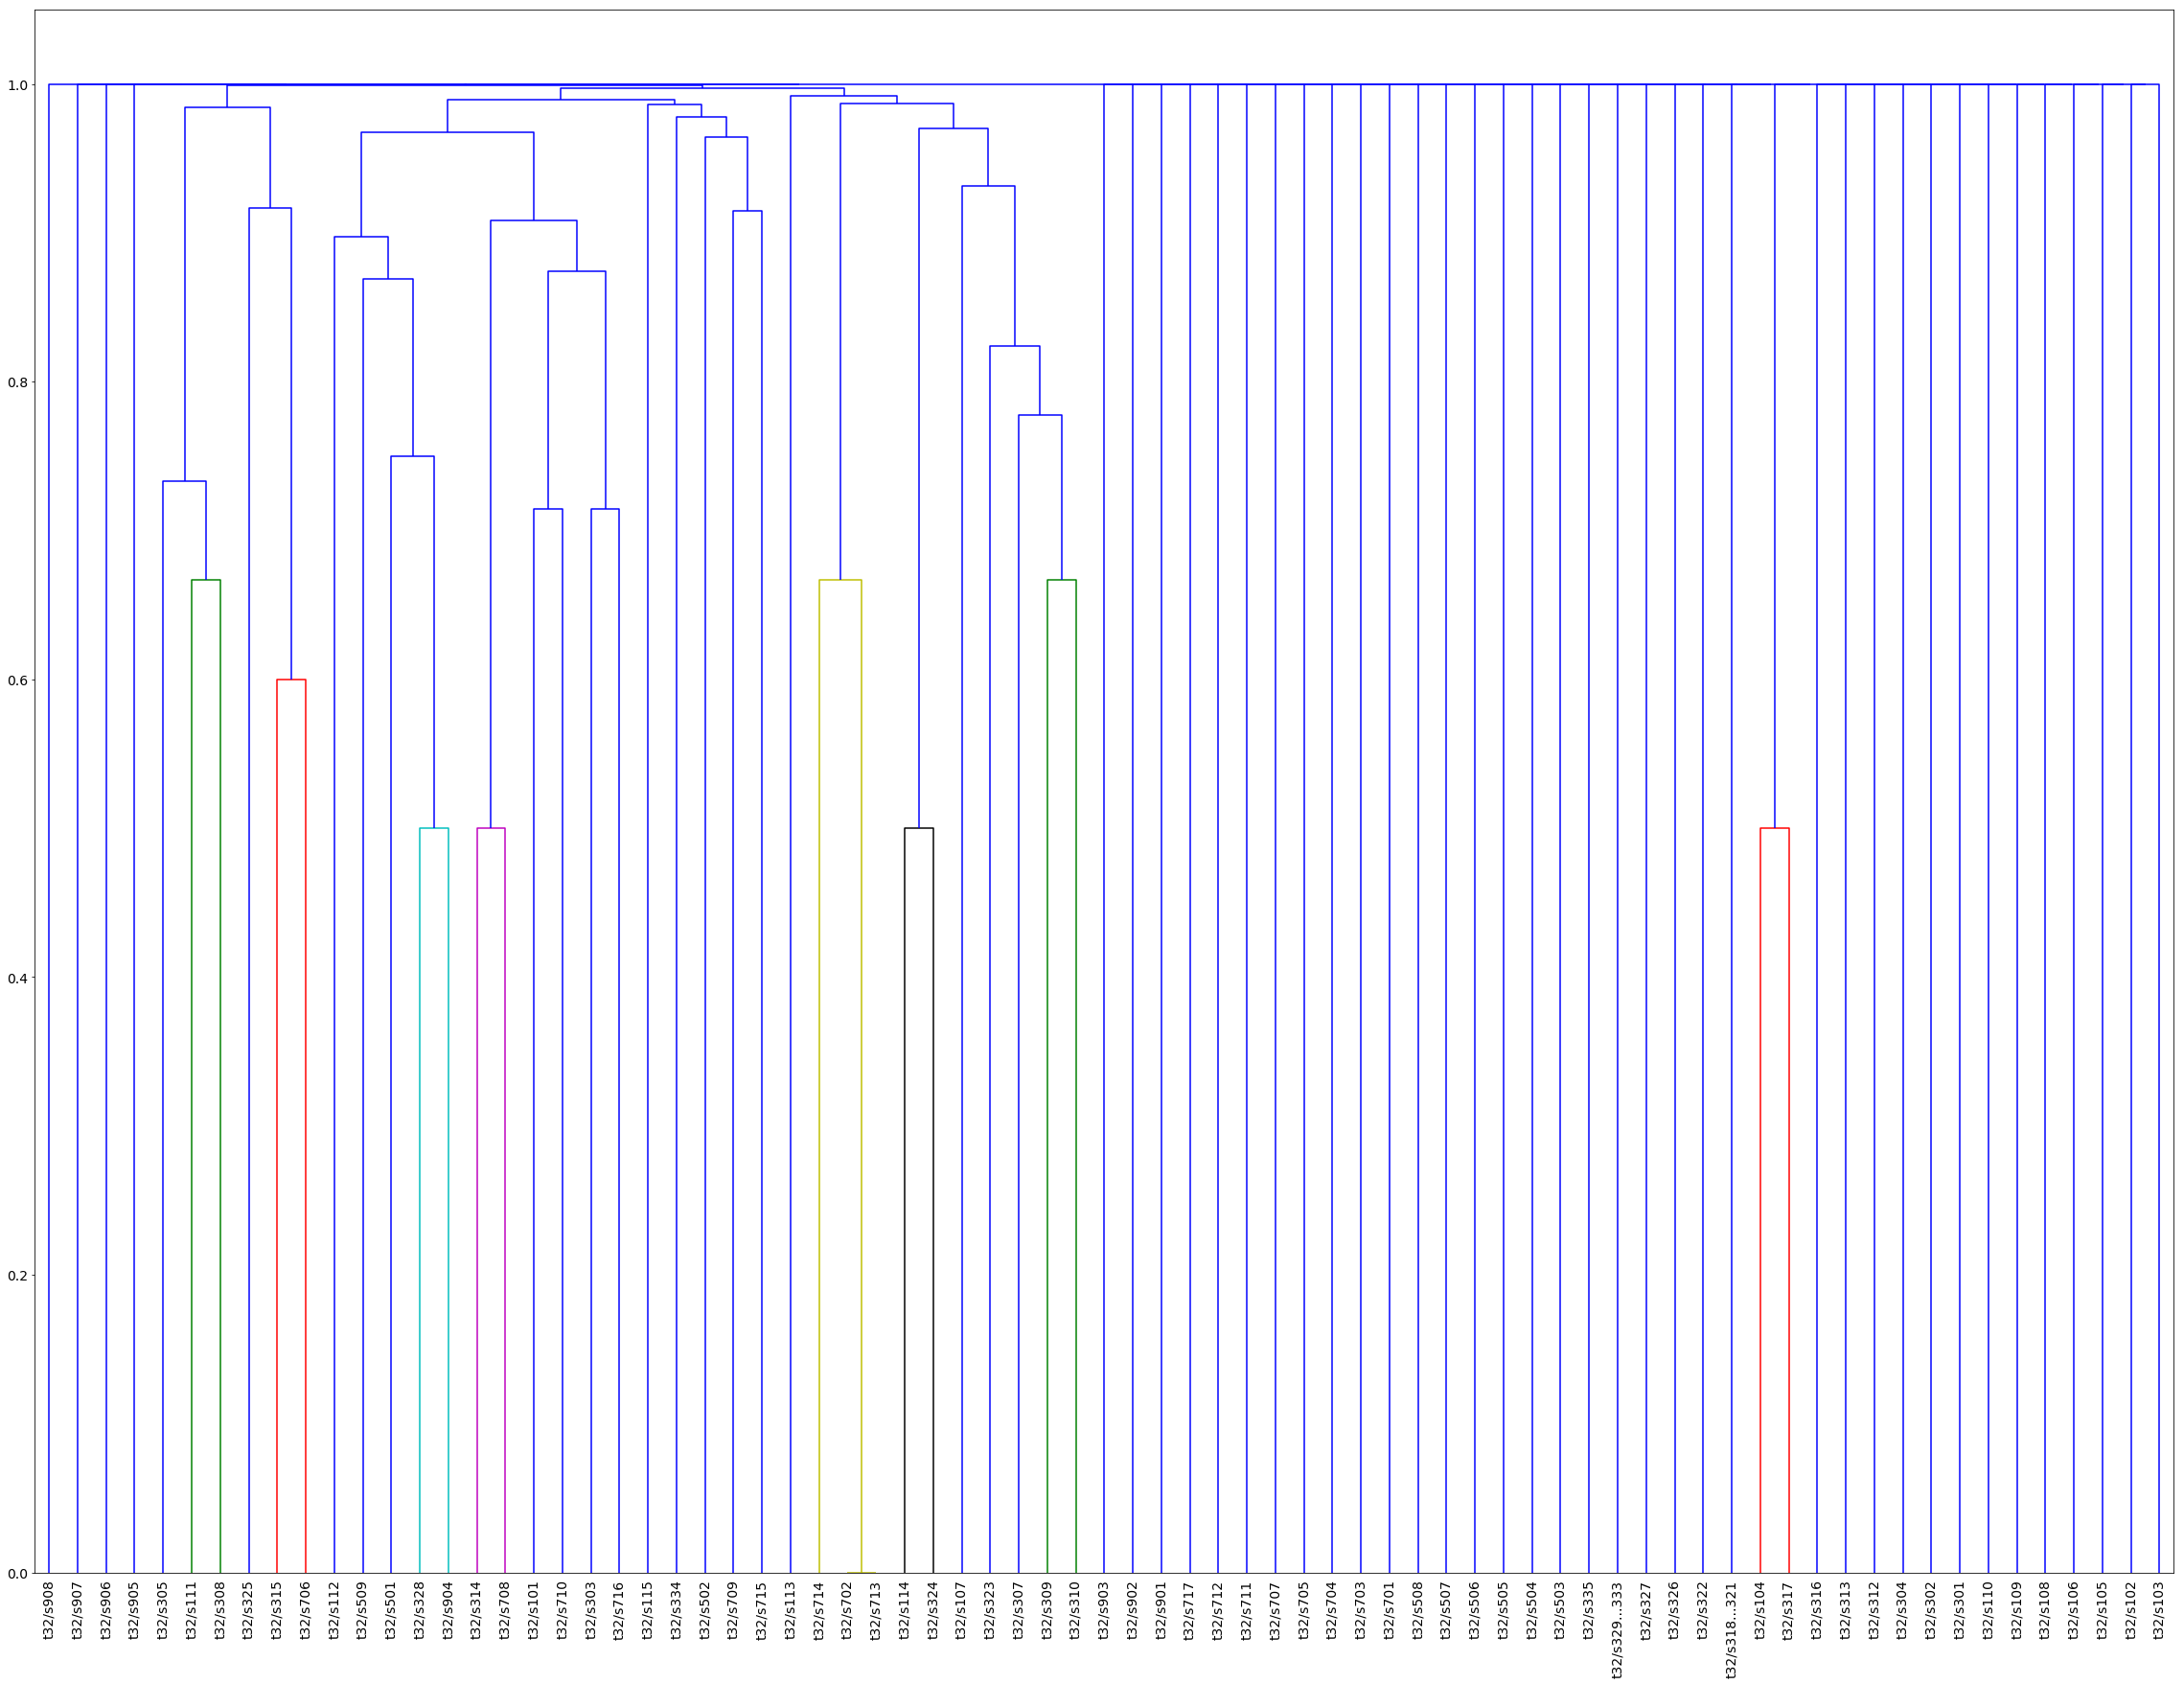

In [8]:
t = 't32'
show_dendrogram(list(usc.titles[t].iter_sections()))

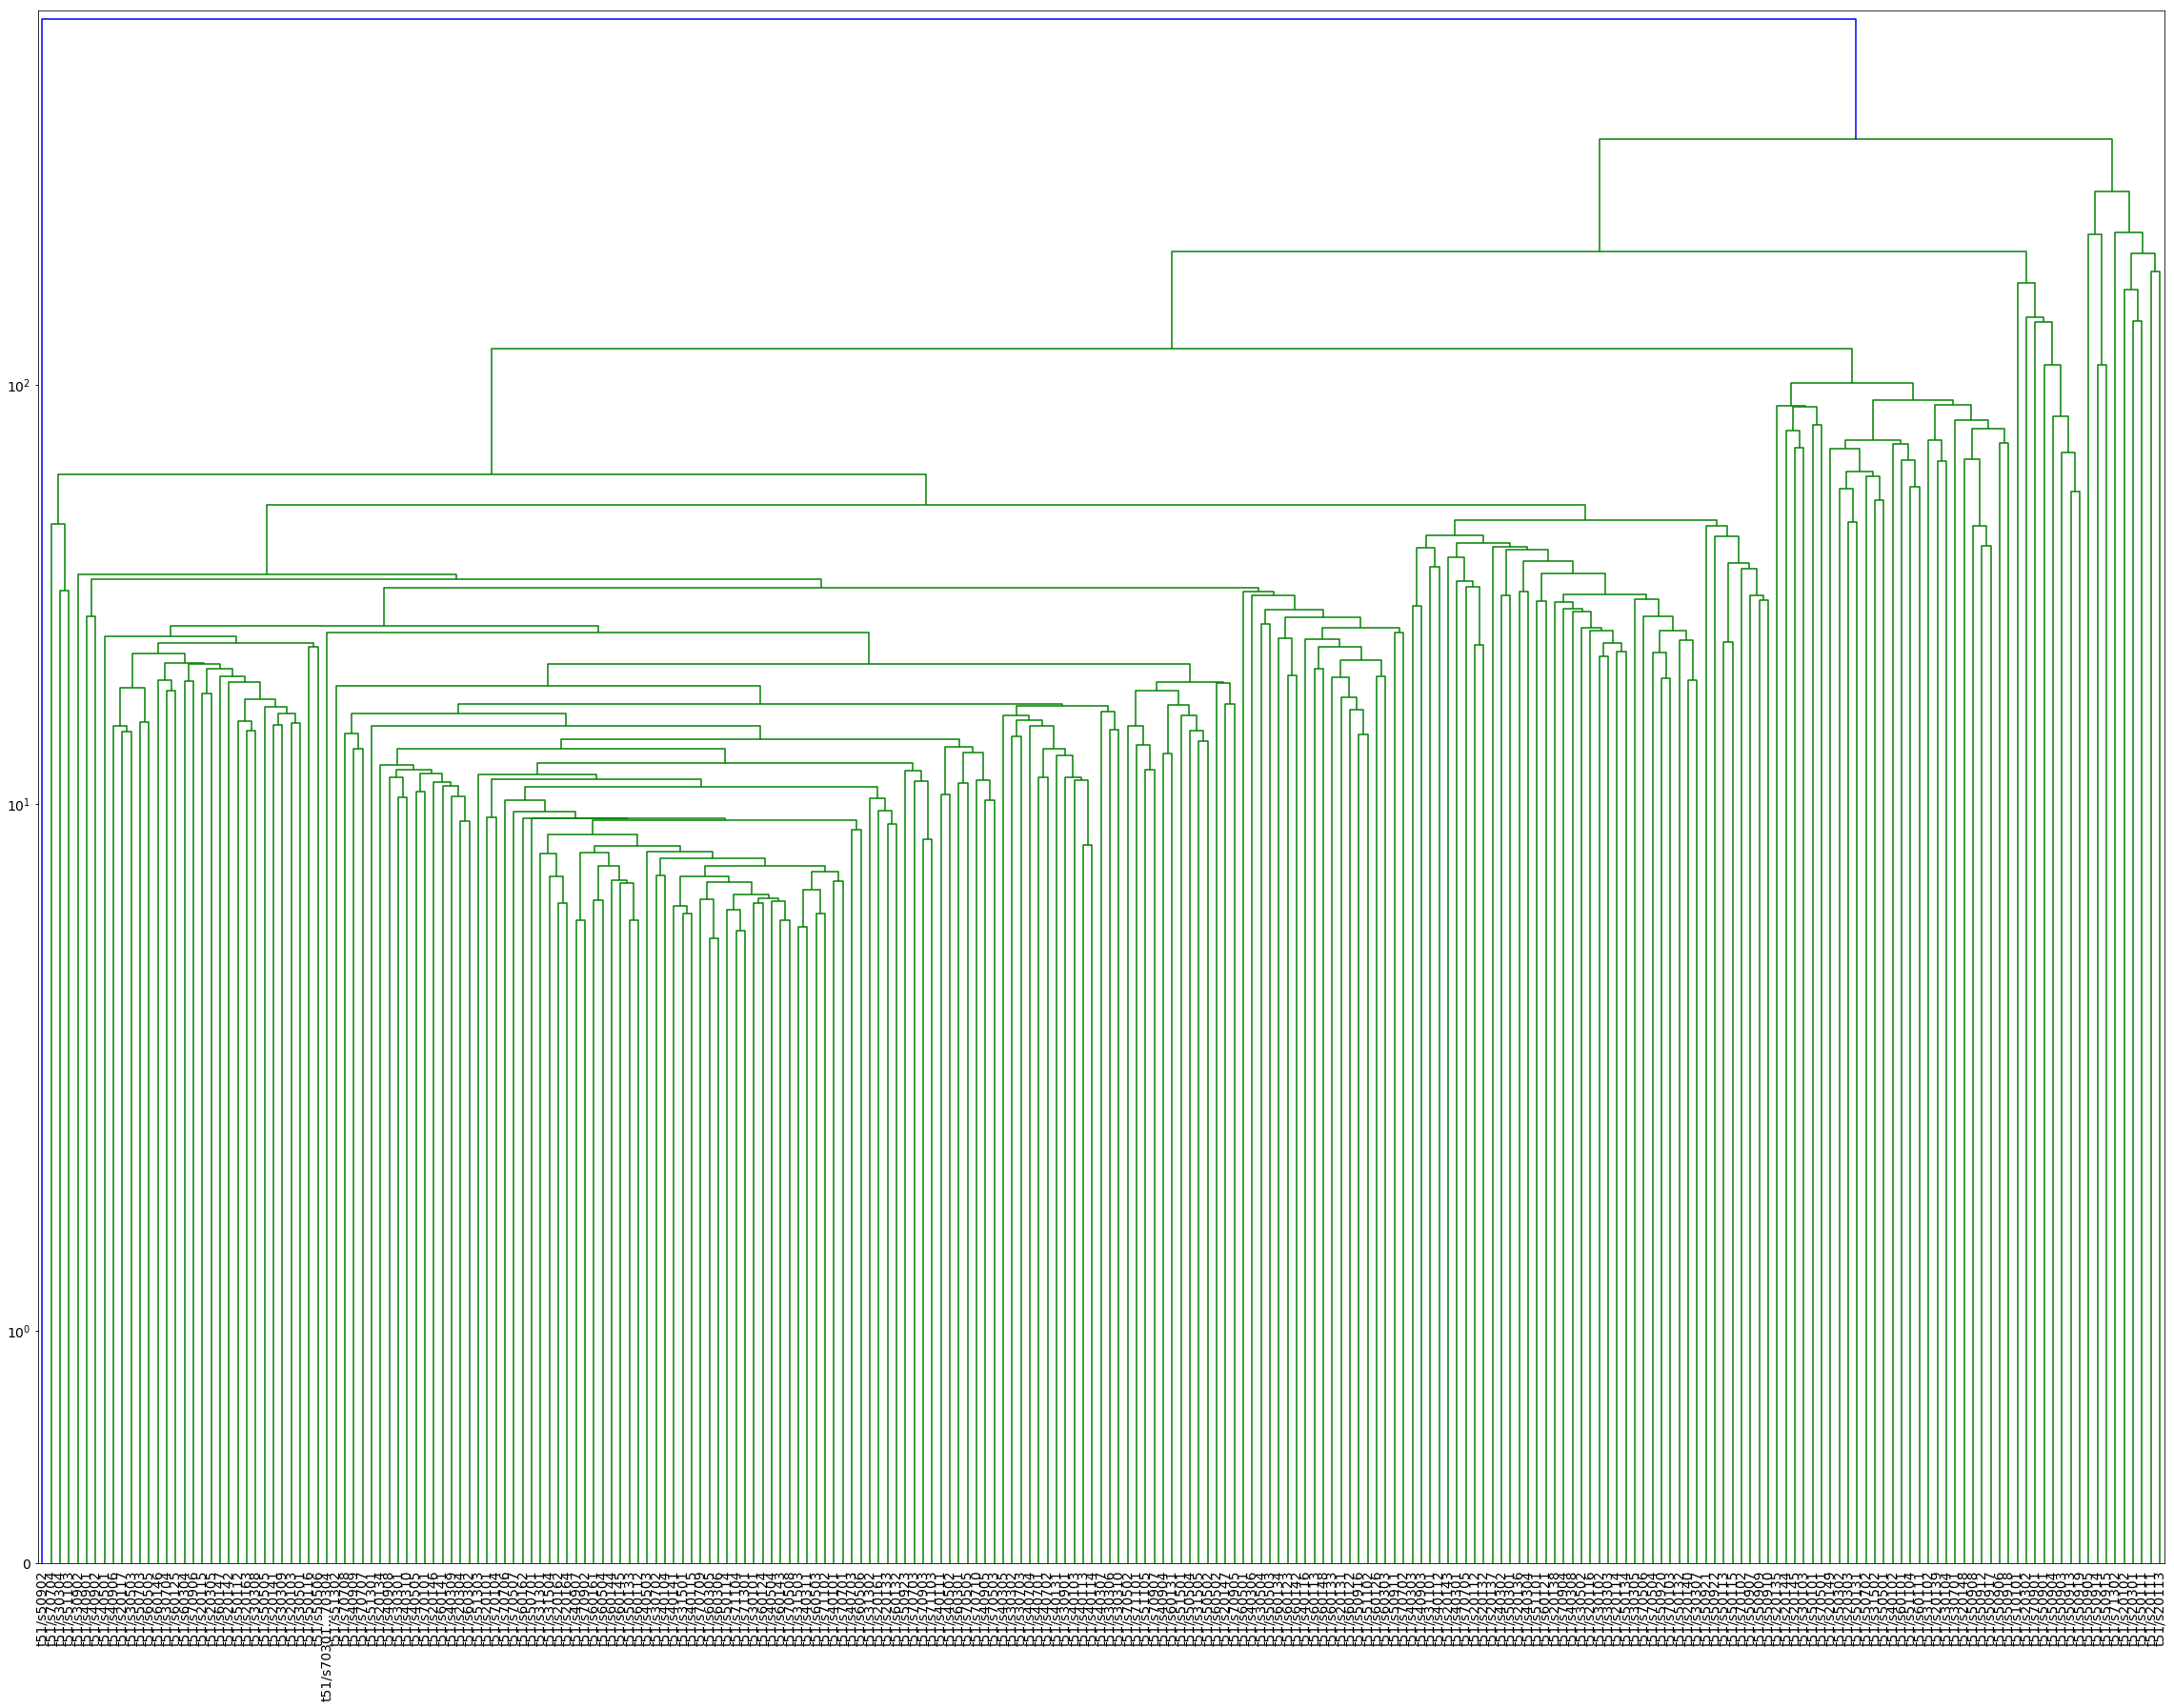

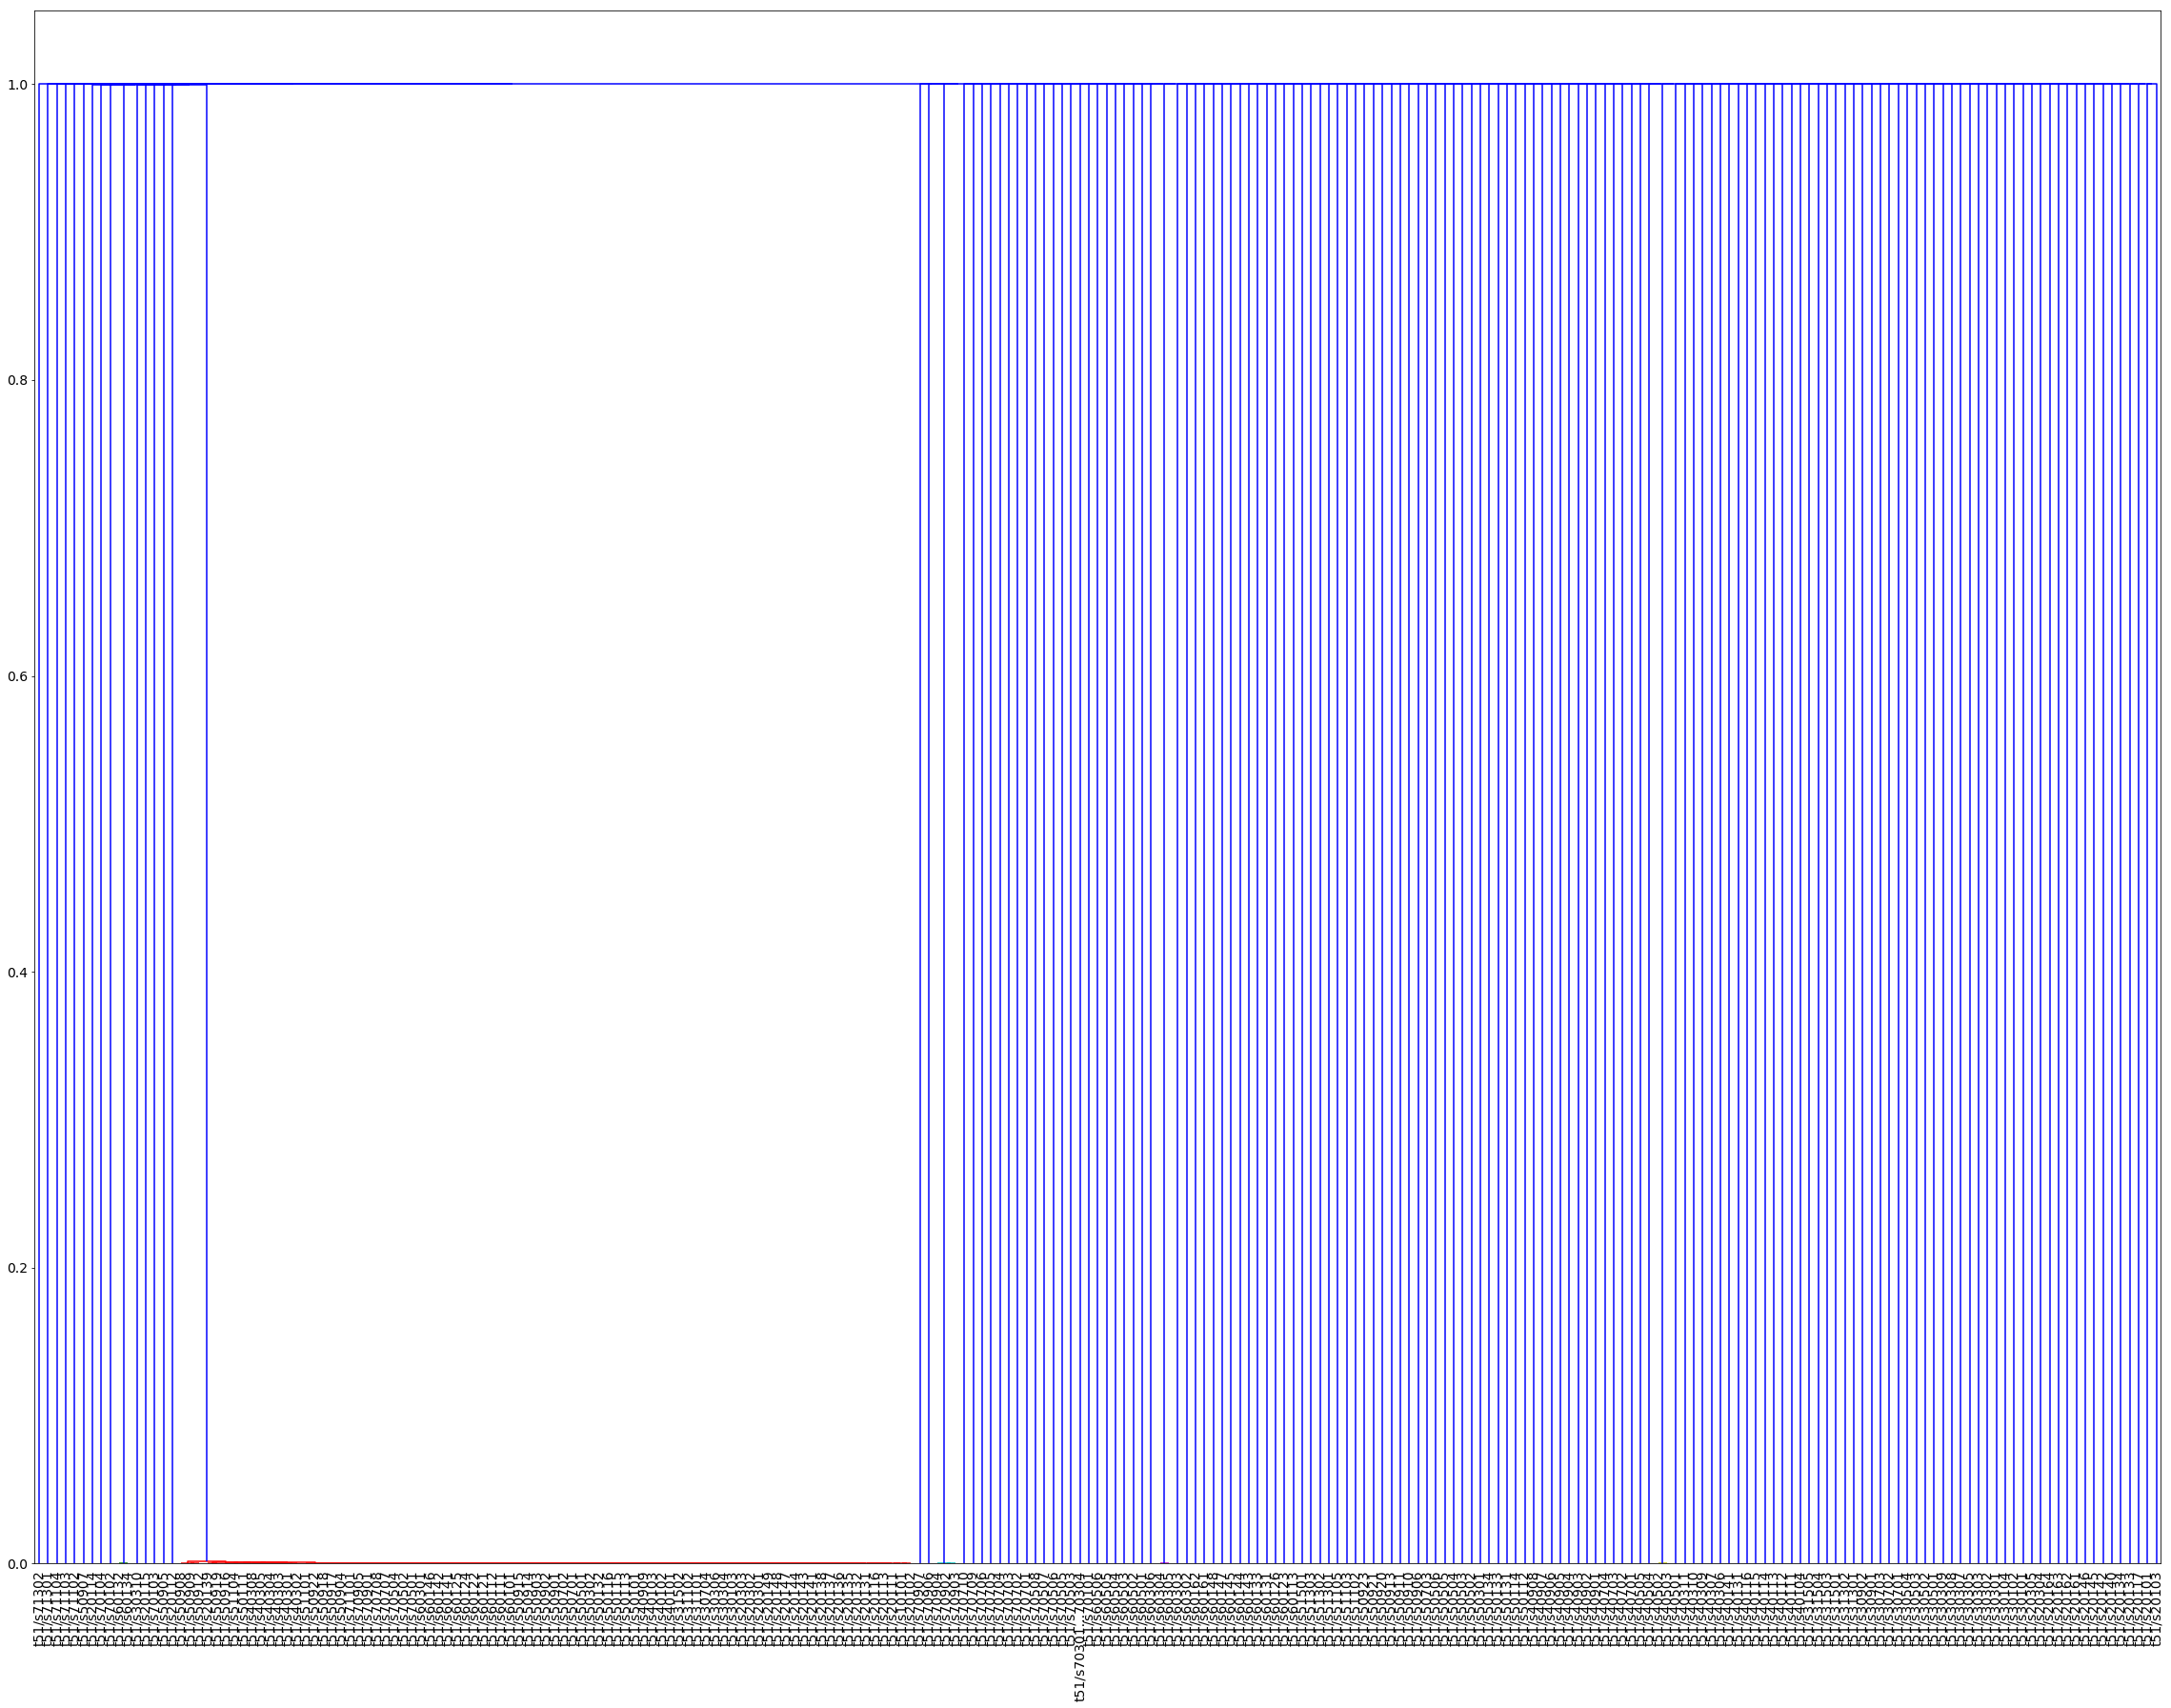

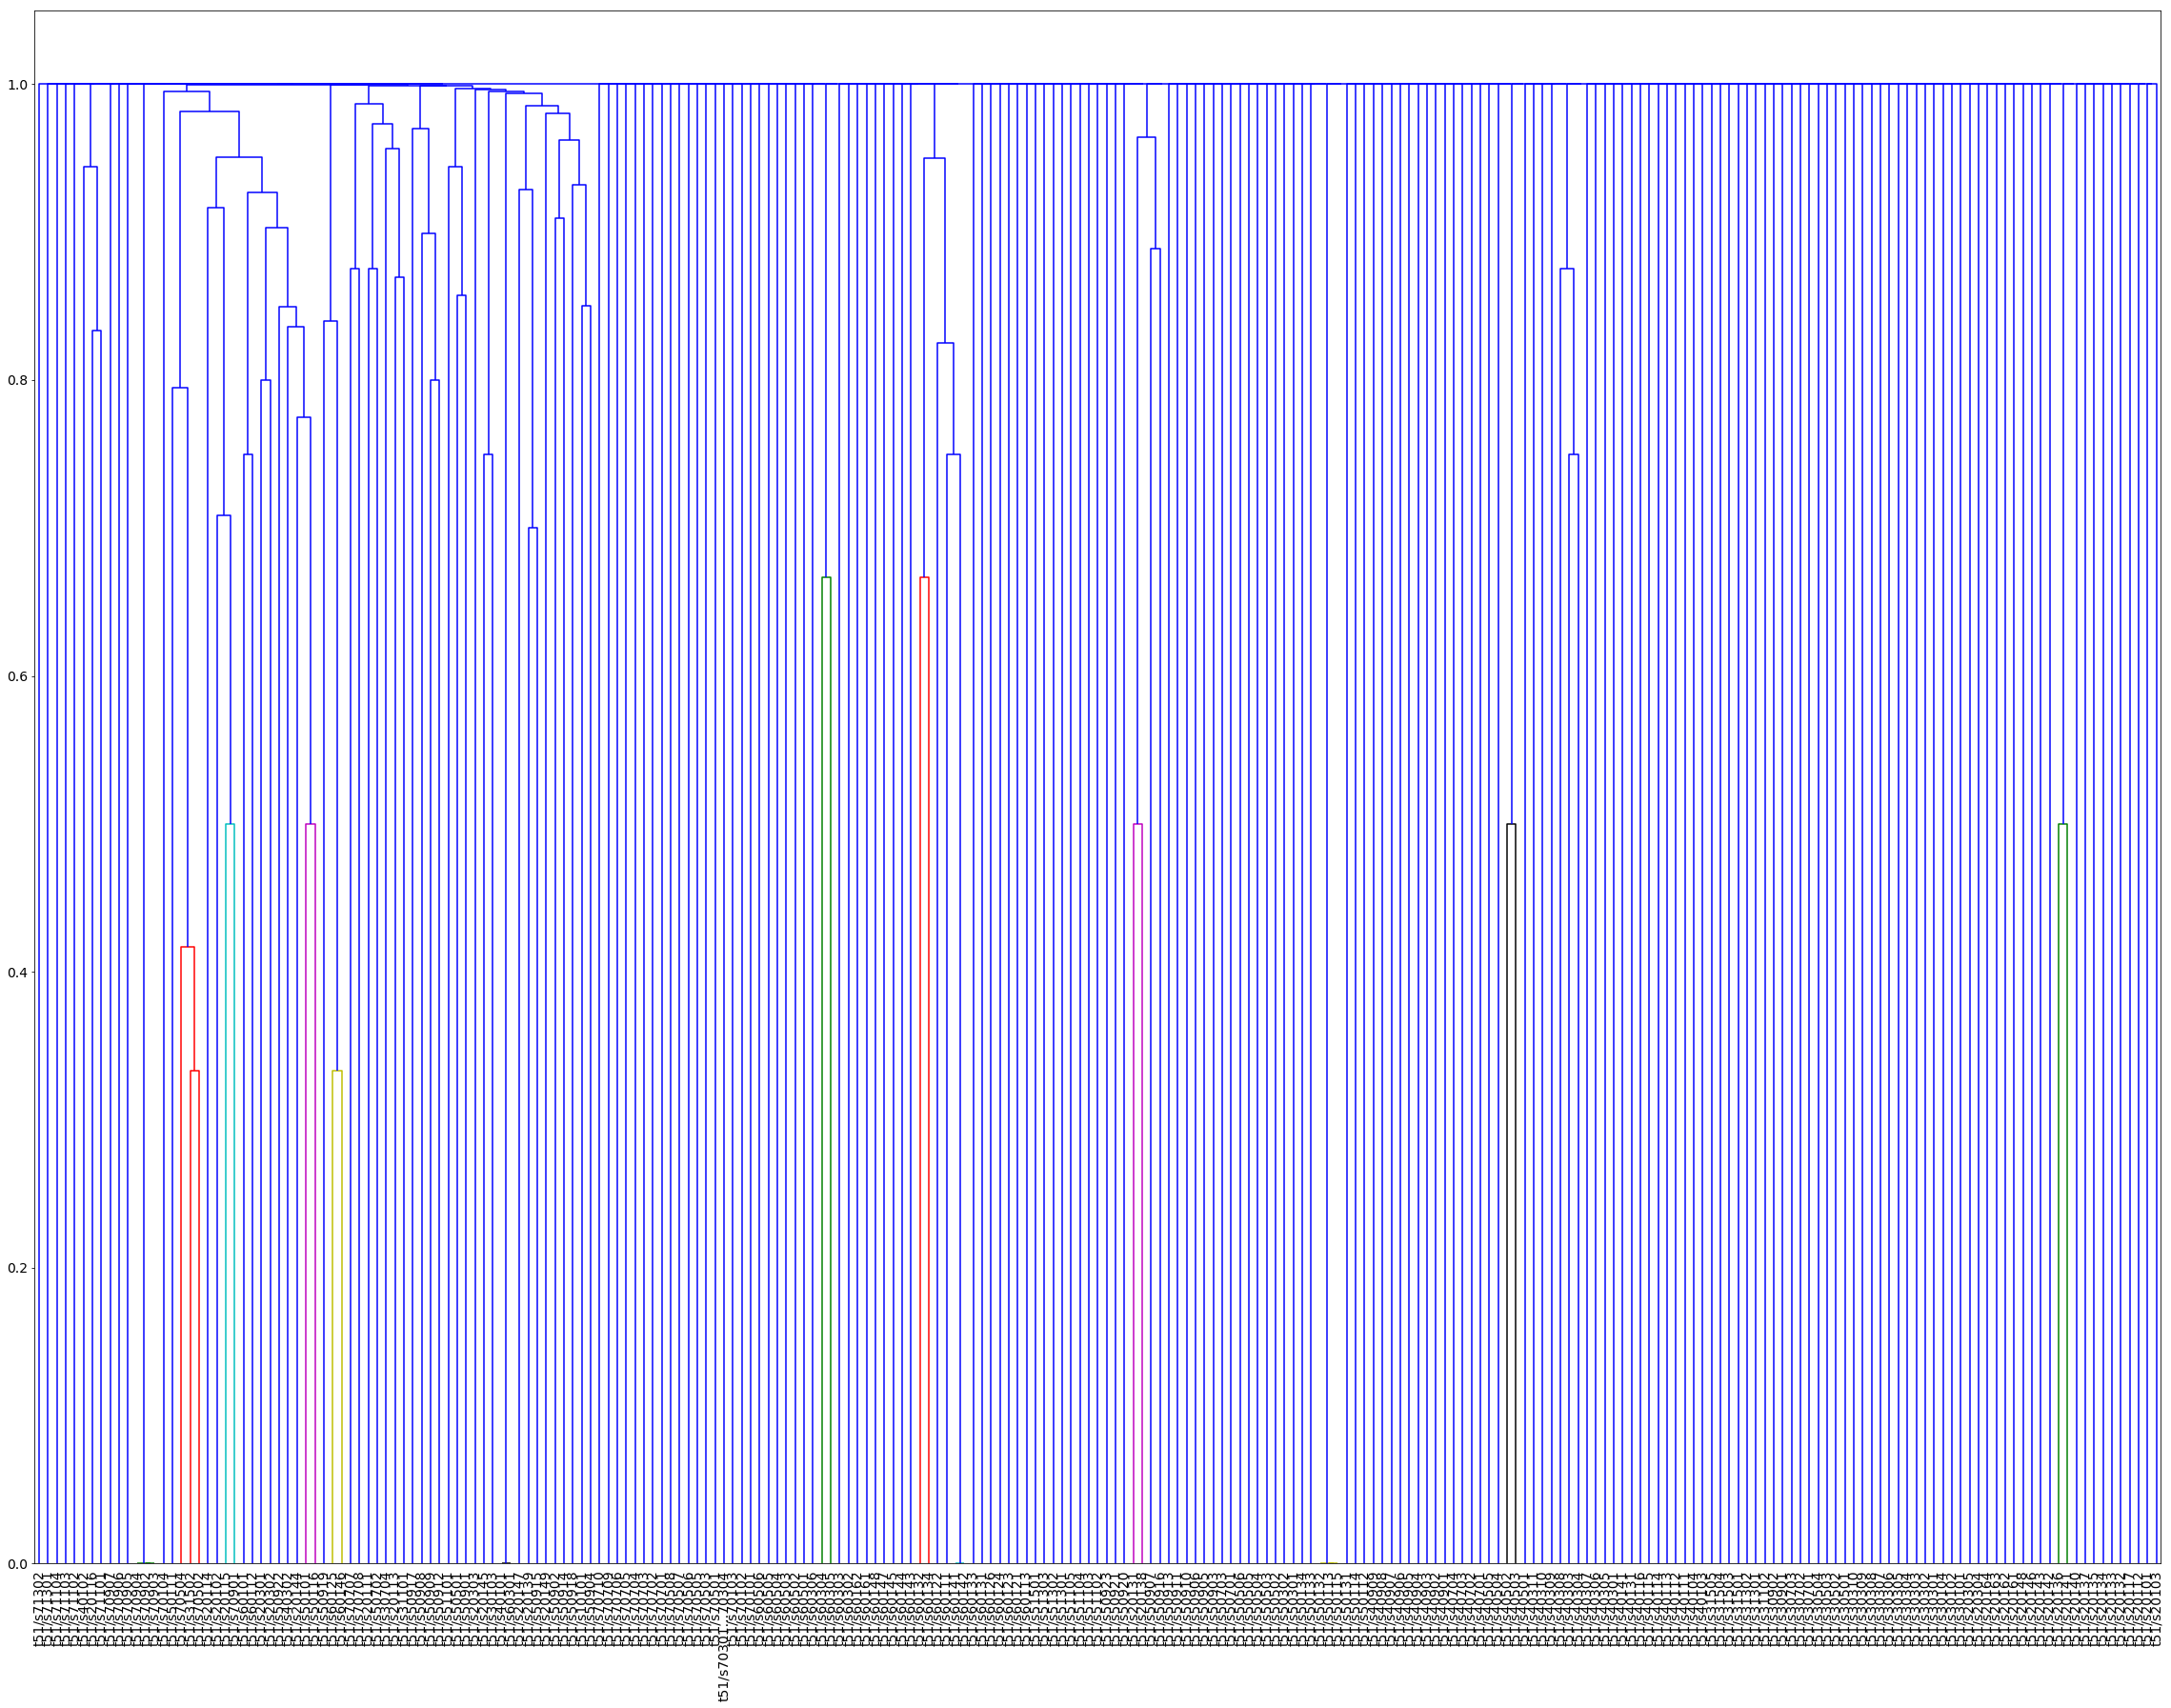

In [9]:
t = 't51'
show_dendrogram(list(usc.titles[t].iter_sections()))